In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
fanadngo = pd.read_csv("fandango_scrape.csv")

In [74]:
fanadngo.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [75]:
fanadngo.info

<bound method DataFrame.info of                                      FILM  STARS  RATING  VOTES
0             Fifty Shades of Grey (2015)    4.0     3.9  34846
1                   Jurassic World (2015)    4.5     4.5  34390
2                  American Sniper (2015)    5.0     4.8  34085
3                        Furious 7 (2015)    5.0     4.8  33538
4                       Inside Out (2015)    4.5     4.5  15749
..                                    ...    ...     ...    ...
499                      Valiyavan (2015)    0.0     0.0      0
500            WWE SummerSlam 2015 (2015)    0.0     0.0      0
501       Yagavarayinum Naa Kaakka (2015)    0.0     0.0      0
502  Yesterday, Today and Tomorrow (1964)    0.0     0.0      0
503                         Zarafa (2012)    0.0     0.0      0

[504 rows x 4 columns]>

In [76]:
fanadngo.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


## TASK: Create a scatterplot showing the relationship between rating and the votes 

<Axes: xlabel='RATING', ylabel='VOTES'>

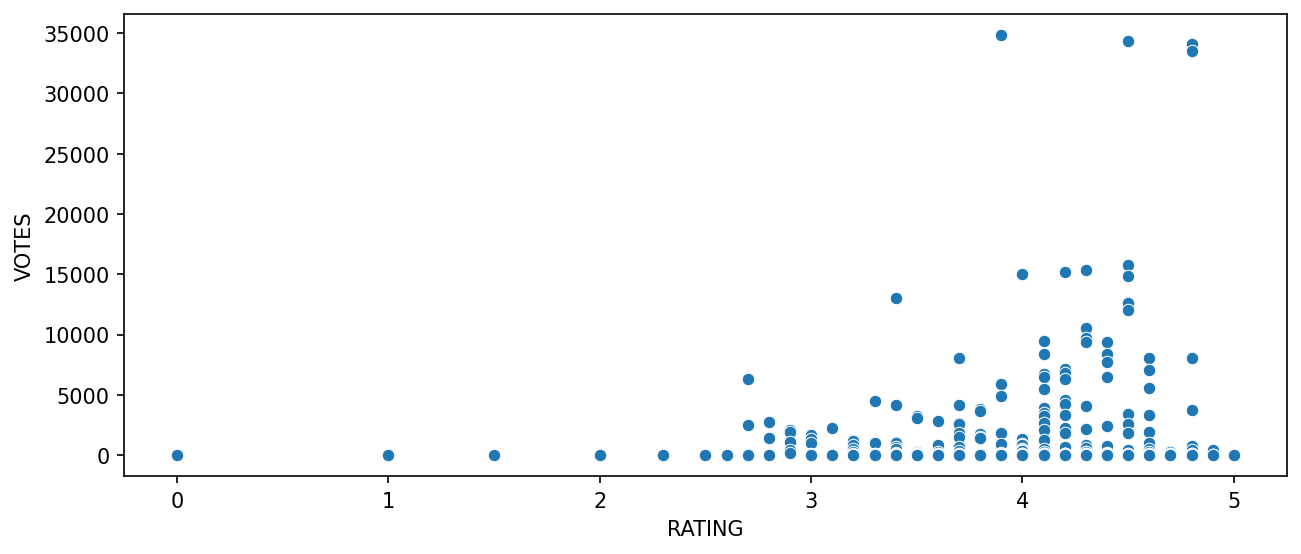

In [77]:
plt.figure(figsize=(10, 4), dpi=150)
sns.scatterplot(data=fanadngo, y='VOTES',x='RATING')

In [78]:
fanadngo.corr()

C:\Users\daich\AppData\Local\Temp\ipykernel_7768\804063503.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  fanadngo.corr()


,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


## TASK: Create a new column that is able to strip year title and make it a whole separate column

In [79]:
fanadngo['YEAR'] = fanadngo['FILM'].apply(lambda title:title.split('(')[-1].replace(')',''))

In [80]:
fanadngo

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


# how many moveis are in dataframe per year

In [81]:
fanadngo['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

# visualize counts of movies per year as plot

<Axes: xlabel='YEAR', ylabel='count'>

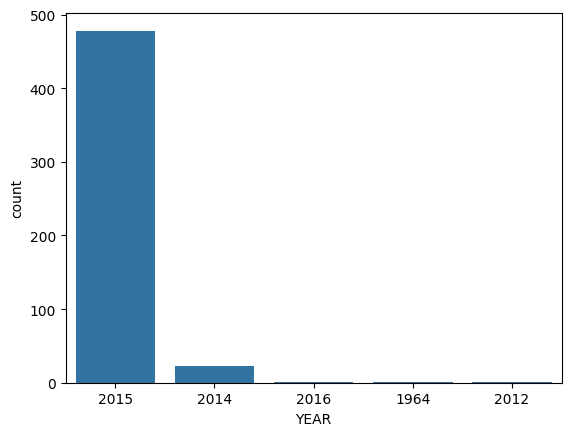

In [82]:
sns.countplot(data=fanadngo, x='YEAR')

# ten movies with highest number of votes

In [83]:
fanadngo.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [84]:
len(fanadngo[fanadngo['VOTES'] == 0])

69

In [85]:
fan_reviewd = fanadngo[fanadngo['VOTES']>0]

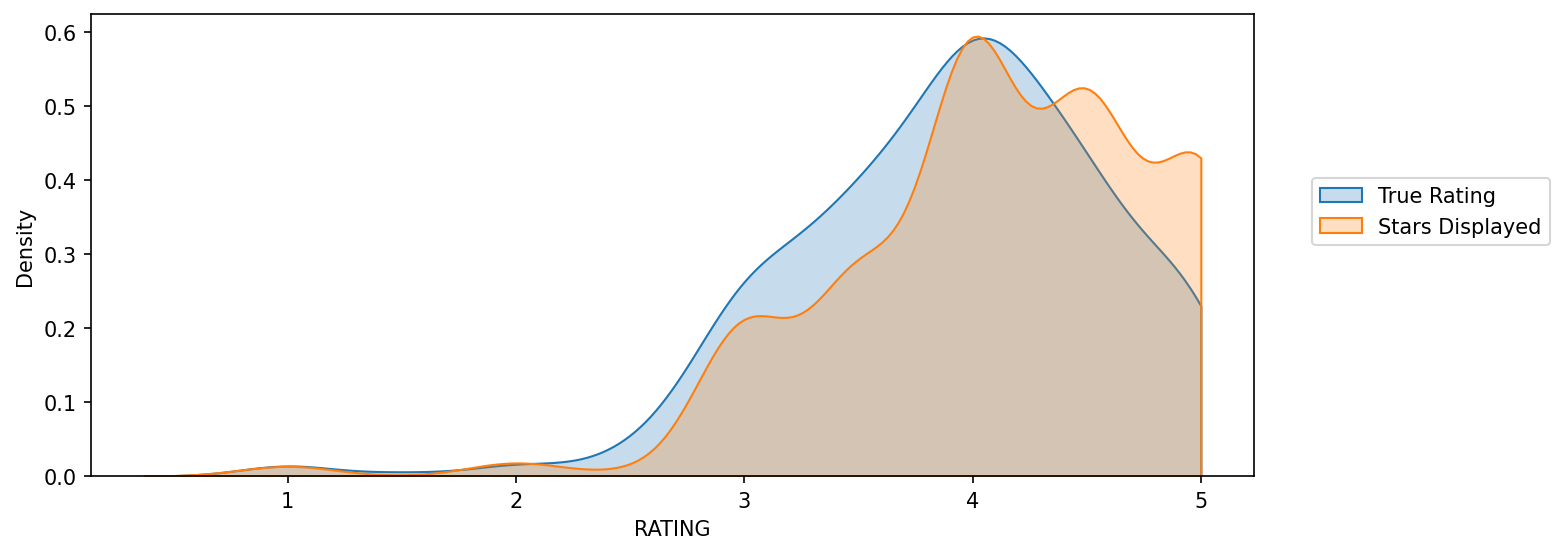

In [86]:
plt.figure(figsize=(10,4),dpi=150)

sns.kdeplot(data=fan_reviewd,x='RATING', clip=[0,5],fill=True,label='True Rating')
sns.kdeplot(data=fan_reviewd,x='STARS', clip=[0,5],fill=True,label='Stars Displayed')\

plt.legend(loc=(1.05,0.5))

# create a new column of stars displayed and actual rating 

In [87]:
fan_reviewd['STARS_DIFF'] = fan_reviewd['STARS'] - fan_reviewd['RATING']

C:\Users\daich\AppData\Local\Temp\ipykernel_7768\3792942130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fan_reviewd['STARS_DIFF'] = fan_reviewd['STARS'] - fan_reviewd['RATING']


In [88]:
fan_reviewd

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


# create a count plot  to display the numbers  of times a certain diffrence occurs:


C:\Users\daich\AppData\Local\Temp\ipykernel_7768\3071079474.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fan_reviewd, x='STARS_DIFF', palette='magma')


<Axes: xlabel='STARS_DIFF', ylabel='count'>

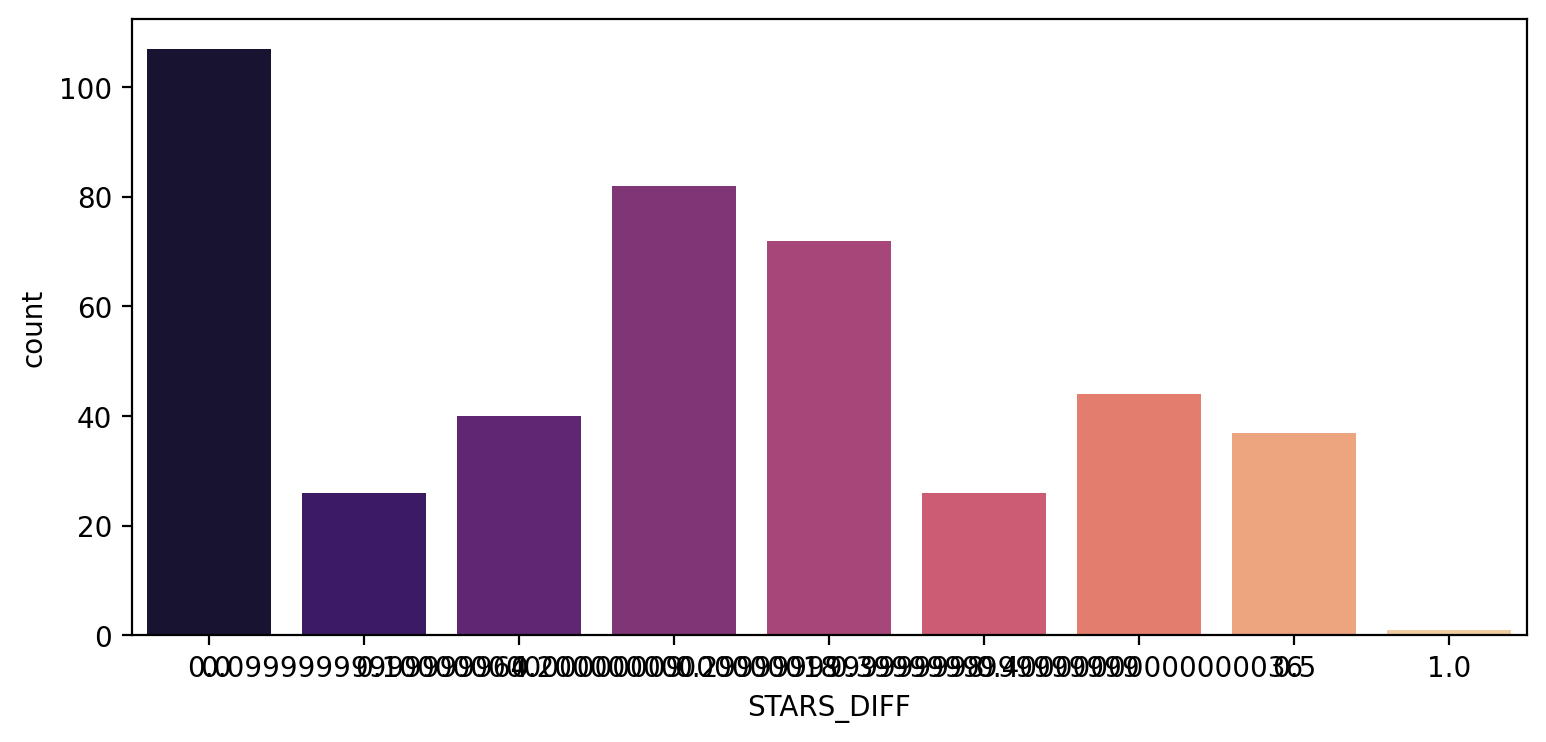

In [89]:
plt.figure(figsize=(9, 4), dpi=200)
sns.countplot(data=fan_reviewd, x='STARS_DIFF', palette='magma')

In [90]:
fan_reviewd[fan_reviewd['STARS_DIFF']==1]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


In [91]:
all_sites = pd.read_csv('all_sites_scores.csv')

In [92]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.3+ KB


In [93]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


# TASK: create a scatterplot exploring the relationship between RT critique reviews and user reviews


(0.0, 100.0)

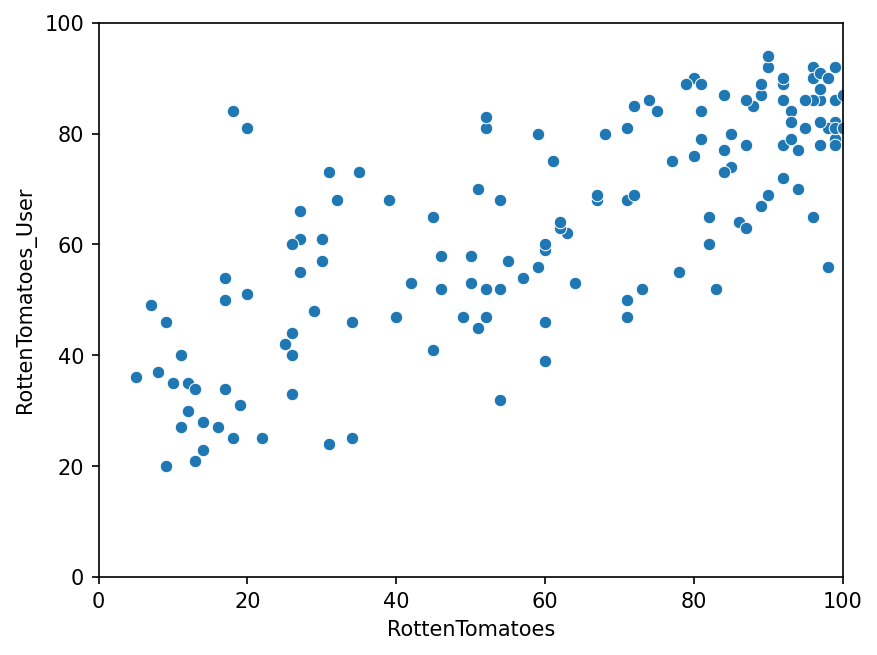

In [94]:
plt.figure(dpi=150)
sns.scatterplot(data=all_sites,x='RottenTomatoes',y='RottenTomatoes_User')
plt.ylim(0,100)
plt.xlim(0,100)

# create a new column based of diffrence between both

In [95]:
all_sites['Rotten_Diff'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [96]:
all_sites

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


mean absolute diffrence would be

In [97]:
all_sites['Rotten_Diff'].apply(abs).mean()

15.095890410958905

plot the distribution of diffrence 

<Axes: xlabel='Rotten_Diff', ylabel='Count'>

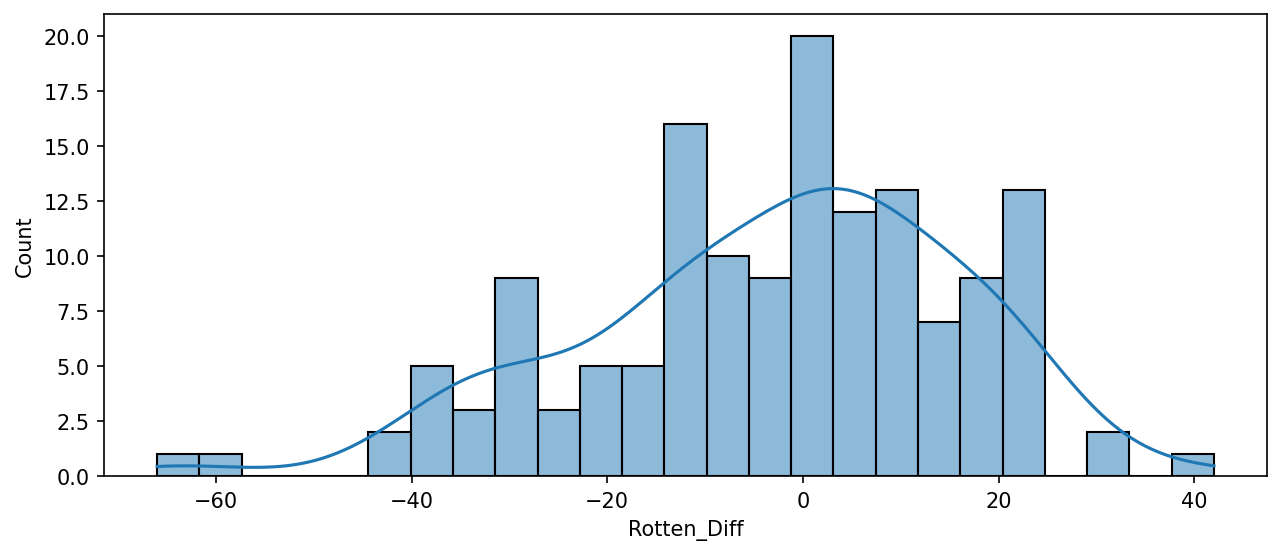

In [98]:
plt.figure(figsize=(10,4),dpi=150)
sns.histplot(data=all_sites,x='Rotten_Diff',kde=True,bins=25)

In [99]:
all_sites.nsmallest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
85,Little Boy (2015),20,81,30,5.9,7.4,38,5927,-61
105,Hitman: Agent 47 (2015),7,49,28,3.3,5.9,67,4260,-42
134,The Longest Ride (2015),31,73,33,4.8,7.2,49,25214,-42
125,The Wedding Ringer (2015),27,66,35,3.3,6.7,126,37292,-39


In [100]:
all_sites.nlargest(5,'Rotten_Diff')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
69,Mr. Turner (2014),98,56,94,6.6,6.9,98,13296,42
112,It Follows (2015),96,65,83,7.5,6.9,551,64656,31
115,While We're Young (2015),83,52,76,6.7,6.4,65,17647,31
37,Welcome to Me (2015),71,47,67,6.9,5.9,33,8301,24
40,I'll See You In My Dreams (2015),94,70,75,6.9,6.9,14,1151,24


## display a scatterplot of metacritic rating and user rating

(0.0, 100.0)

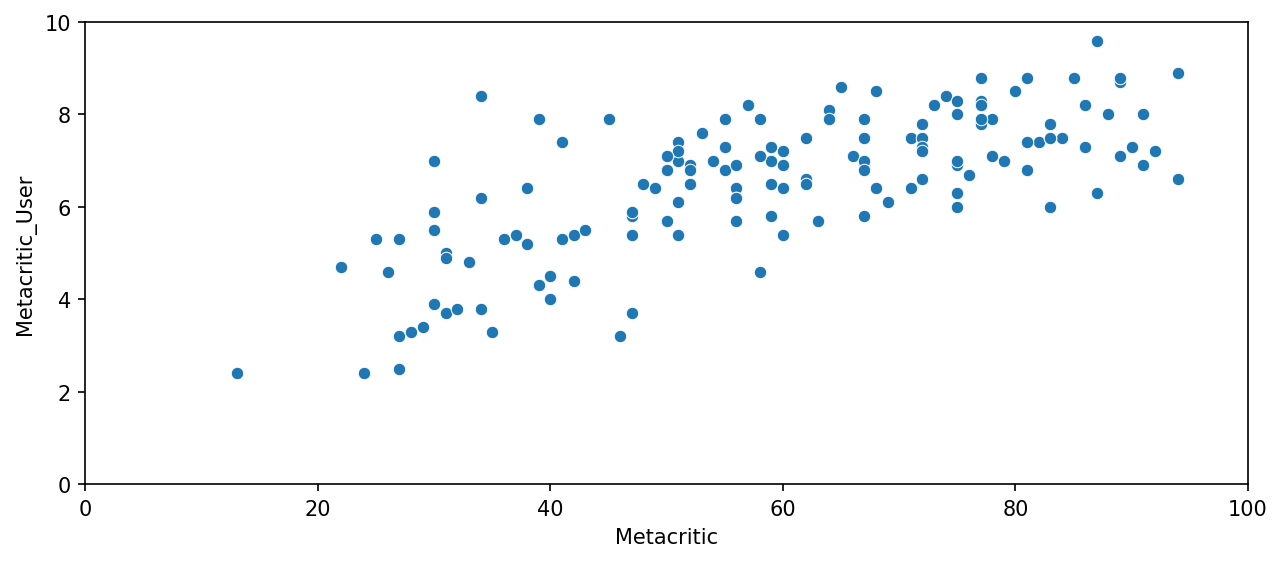

In [101]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic',y='Metacritic_User')
plt.ylim(0,10)
plt.xlim(0,100)

<Axes: xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

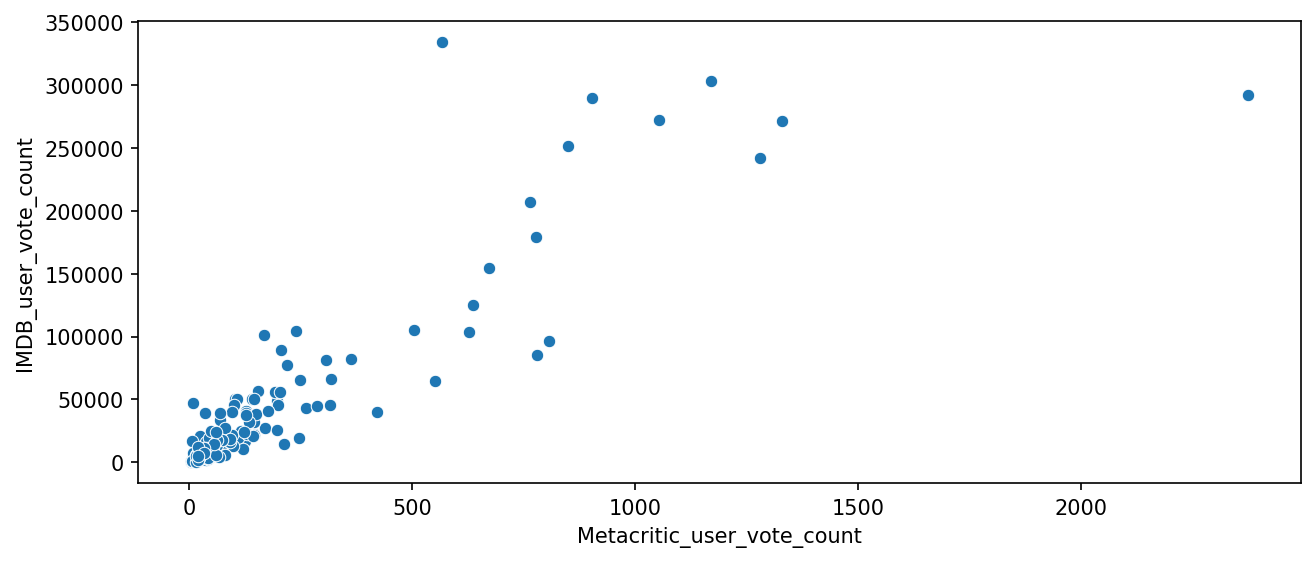

In [102]:
plt.figure(figsize=(10,4),dpi=150)
sns.scatterplot(data=all_sites,x='Metacritic_user_vote_count',y='IMDB_user_vote_count')

## Notice there are two outliers here. THe movies with the highest votecount on imdb only has 500 meta critic vote  which is that movies
 
 TASK: Find the movies

In [103]:
all_sites.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2


In [104]:
all_sites.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9


# combine fandango table with all sites table and analyze

In [105]:
df = pd.merge(fanadngo,all_sites, on='FILM',how='inner')

In [106]:
df

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9


# normalise the columns to fandango stars and ratings 

In [107]:
df.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Name: max, dtype: float64

In [111]:
import numpy as np

In [116]:
df['RT_NORM'] = np.round(df['RottenTomatoes']/20,1)
df['RTU_NORM'] = np.round(df['RottenTomatoes_User']/20,1)

In [120]:
df['Meta_NORM'] = np.round(df['Metacritic']/20,1)
df['MetaU_NORM'] = np.round(df['Metacritic_User']/2,1)

In [122]:
df['IMDB_Norm'] = np.round(df['IMDB']/2,1)

In [123]:
df.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,RT_NORM,RTU_NORM,Meta_NORM,MetaU_NORM,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,4.9,4.5,4.7,4.4,4.3


# create a norm score dataframe the only contains norms rating

In [125]:
df.columns

Index(['FILM', 'STARS', 'RATING', 'VOTES', 'YEAR', 'RottenTomatoes',
       'RottenTomatoes_User', 'Metacritic', 'Metacritic_User', 'IMDB',
       'Metacritic_user_vote_count', 'IMDB_user_vote_count', 'Rotten_Diff',
       'RT_NORM', 'RTU_NORM', 'Meta_NORM', 'MetaU_NORM', 'IMDB_Norm'],
      dtype='object')

In [128]:
norm_scores = df[['FILM','STARS', 'RATING','RT_NORM', 'RTU_NORM', 'Meta_NORM', 'MetaU_NORM', 'IMDB_Norm']]

In [129]:
norm_scores.head()

,FILM,STARS,RATING,RT_NORM,RTU_NORM,Meta_NORM,MetaU_NORM,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.0,3.0,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.0,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3


# create a scatterplot that compare normal rating to that of fandango to the all other sites compared there are many ways to do it ofc

<Axes: ylabel='Density'>

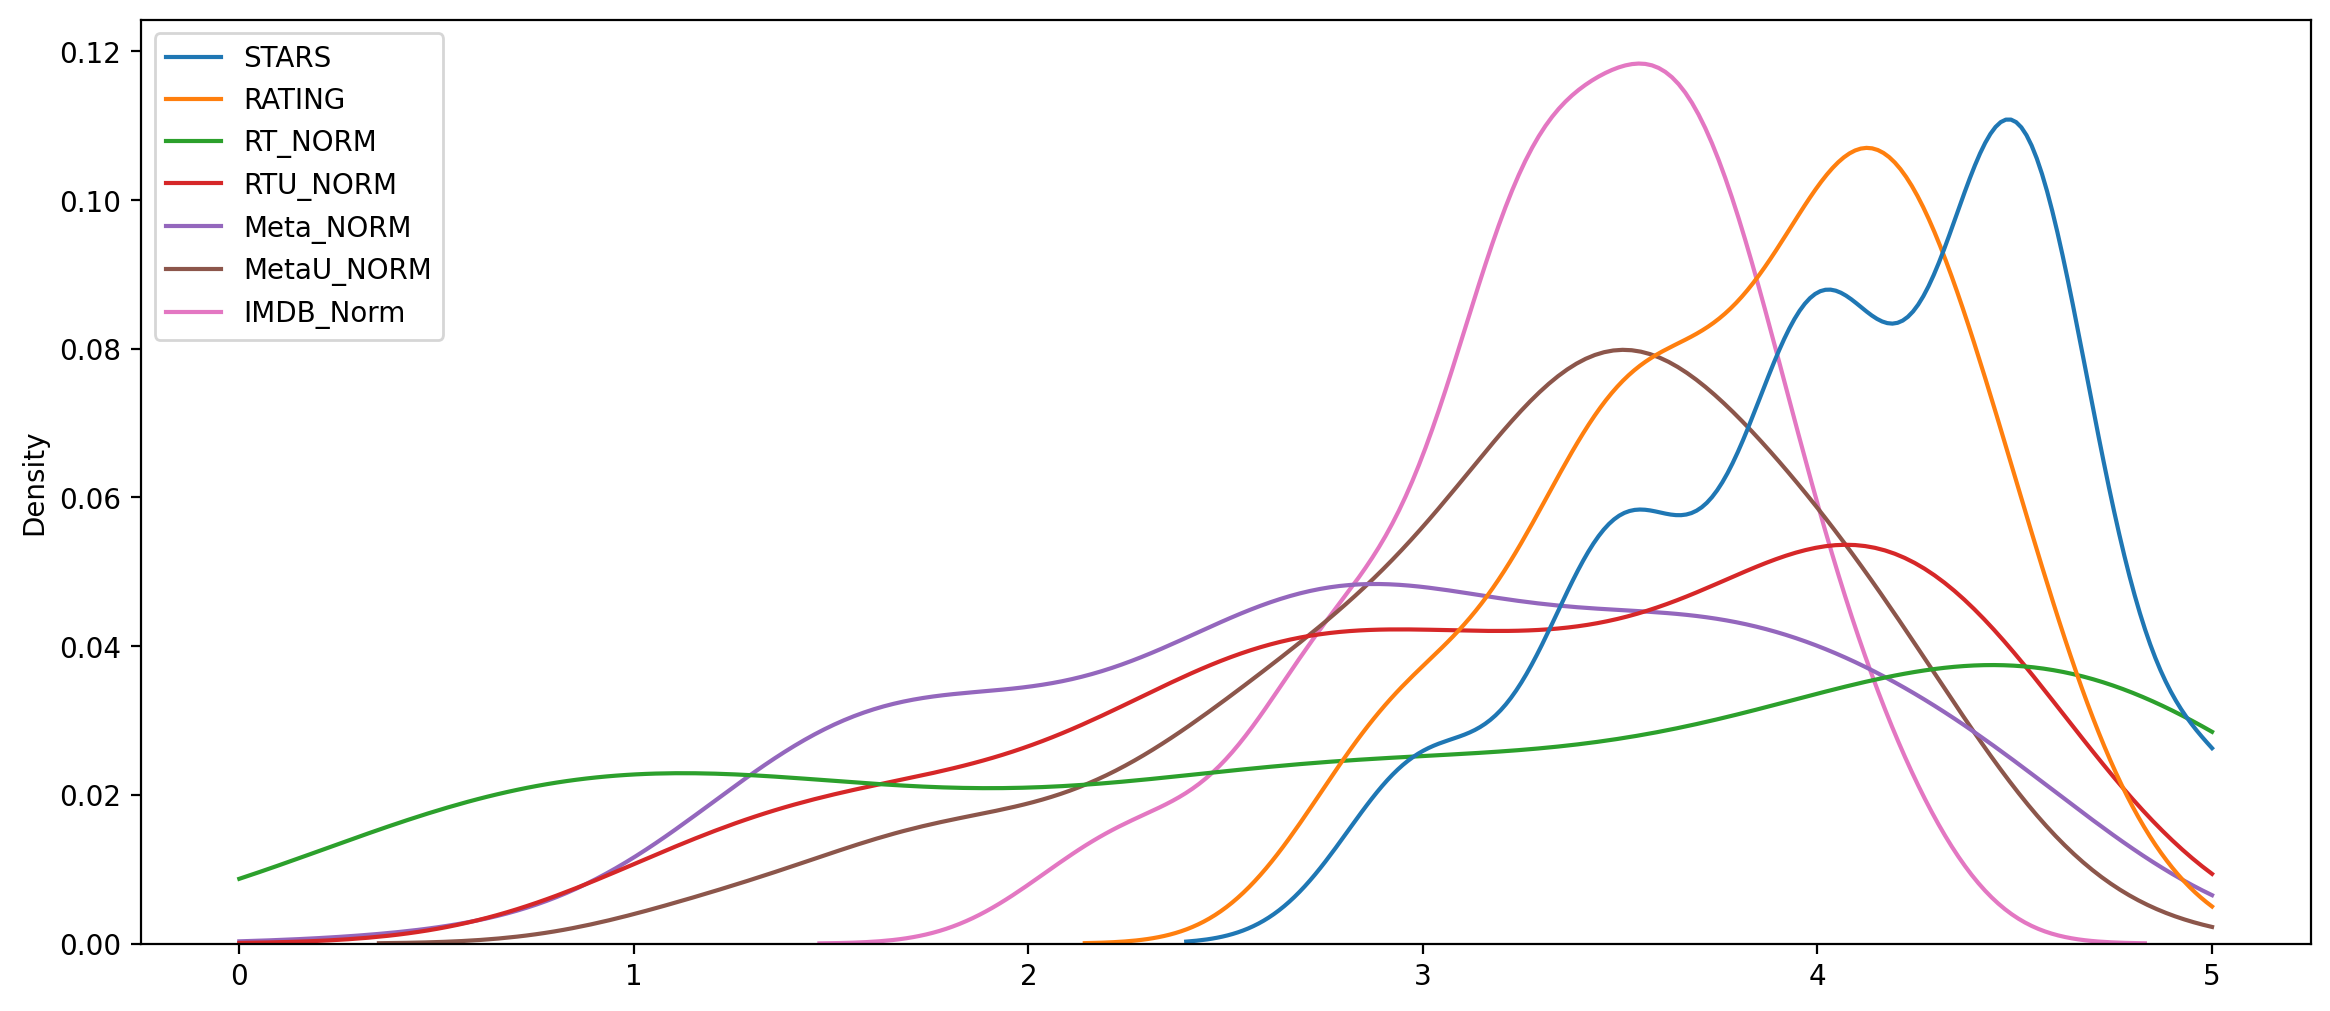

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6),dpi=200)
sns.kdeplot(data=norm_scores,clip=[0,5])
   

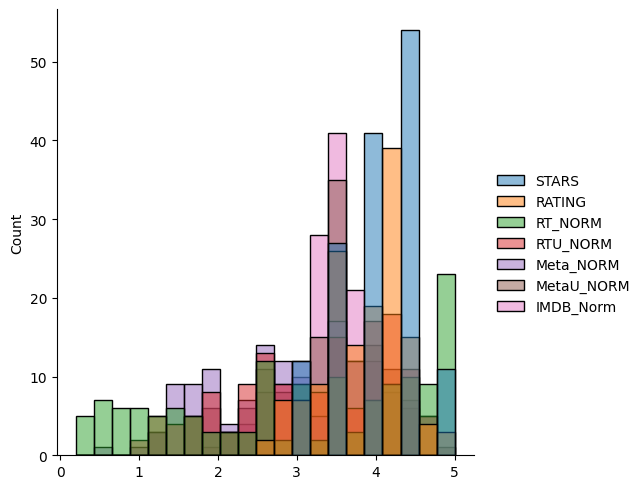

In [135]:
sns.displot(data=norm_scores)

<Axes: ylabel='Count'>

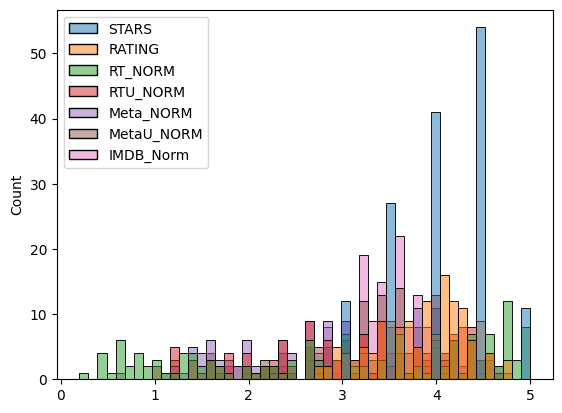

In [143]:
sns.histplot(norm_scores,bins=50)

ValueError: could not convert string to float: 'Fifty Shades of Grey (2015)'

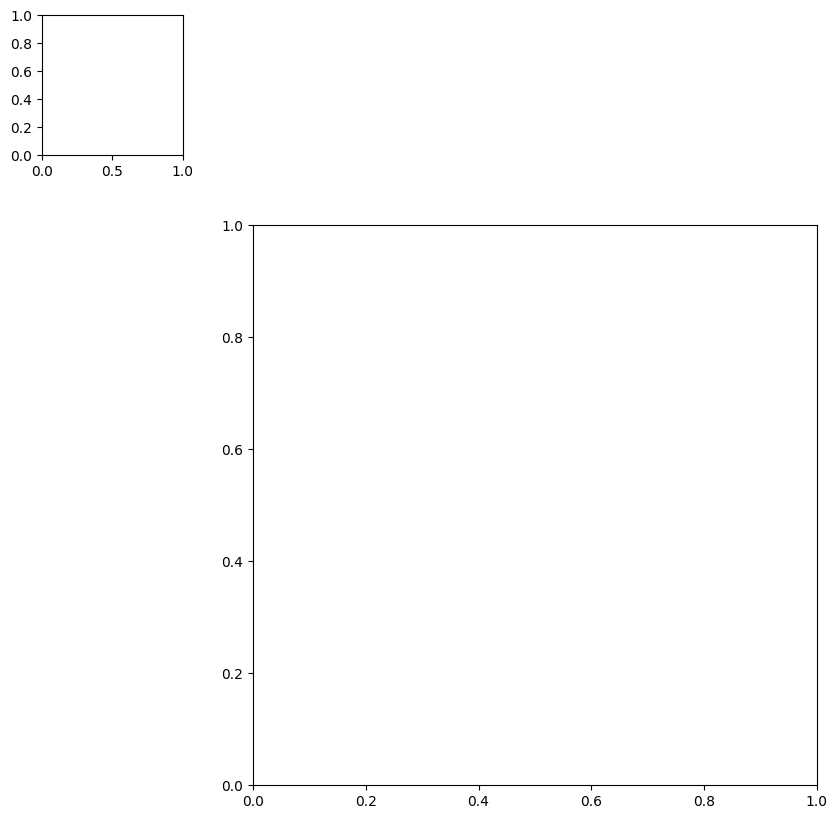

In [147]:
sns.clustermap(norm_scores)

In [152]:
norm_scores.columns

Index(['FILM', 'STARS', 'RATING', 'RT_NORM', 'RTU_NORM', 'Meta_NORM',
       'MetaU_NORM', 'IMDB_Norm'],
      dtype='object')

In [153]:
norm_scores.nsmallest(5,'RT_NORM')

,FILM,STARS,RATING,RT_NORM,RTU_NORM,Meta_NORM,MetaU_NORM,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
